DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

Problem Statement:-  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Content:-

Dataset columns and definition:-

 

• credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

• purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

• int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

• installment: The monthly installments owed by the borrower if the loan is funded.

• log.annual.inc: The natural log of the self-reported annual income of the borrower.

• dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

• fico: The FICO credit score of the borrower.

• days.with.cr.line: The number of days the borrower has had a credit line.

• revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

• revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

• inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

• delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

• pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

Steps to perform:-

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:-

1. Feature Transformation

1.1. Transform categorical values into numerical values (discrete)

2. Exploratory data analysis of different factors of the dataset.

3. Additional Feature Engineering

3.1. You will check the correlation between features and will drop those features which have a strong correlation

3.2. This will help reduce the number of features and will leave you with the most relevant features

4. Modeling

4.1. After applying EDA and feature engineering, you are now ready to build the predictive models

4.2. In this part, you will create a deep learning model using Keras with Tensorflow backend

# Import Required Libraries ...

In [85]:
import tensorflow as tf
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('loan_data.csv')

In [87]:
df.head(15)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [88]:
df.shape

(9578, 14)

# 1. FEATURE TRANSFORMATION - 

1.1. Transform categorical values into numerical values (discrete)

In [89]:
df['purpose'] = pd.factorize(df['purpose'])[0]

In [90]:
df['purpose'].value_counts()

0    3957
2    2331
1    1262
3     629
4     619
5     437
6     343
Name: purpose, dtype: int64

# 2. EXPLORATORY DATA ANALYSIS OF DIFFERENT FACTORS OF THE DATASET.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


In [92]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

► Null values not found.

In [93]:
df.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.517018,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,1.690891,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# 3. ADDITIONAL FEATURE ENGINEERING

3.1. You will check the correlation between features and will drop those features which have a strong correlation

In [94]:
corr_matrix = df.corr().abs()
corr_matrix

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.017331,0.294089,0.058770,0.034906,0.090901,0.348319,0.099026,0.187518,0.104095,0.535511,0.076318,0.054243,0.158119
purpose,0.017331,1.000000,0.061173,0.119683,0.019800,0.199278,0.144098,0.010047,0.031574,0.239537,0.061419,0.000417,0.029831,0.044193
int.rate,0.294089,0.061173,1.000000,0.276140,0.056383,0.220006,0.714821,0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.119683,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,0.010419,0.004368,0.032760,0.049955
log.annual.inc,0.034906,0.019800,0.056383,0.448102,1.000000,0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,0.033439
dti,0.090901,0.199278,0.220006,0.050202,0.054065,1.000000,0.241191,0.060101,0.188748,0.337109,0.029189,0.021792,0.006209,0.037362
fico,0.348319,0.144098,0.714821,0.086039,0.114576,0.241191,1.000000,0.263880,0.015553,0.541289,0.185293,0.216340,0.147592,0.149666
days.with.cr.line,0.099026,0.010047,0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,0.024239,0.041736,0.081374,0.071826,0.029237
revol.bal,0.187518,0.031574,0.092527,0.233625,0.372140,0.188748,0.015553,0.229344,1.000000,0.203779,0.022394,0.033243,0.031010,0.053699
revol.util,0.104095,0.239537,0.464837,0.081356,0.054881,0.337109,0.541289,0.024239,0.203779,1.000000,0.013880,0.042740,0.066717,0.082088


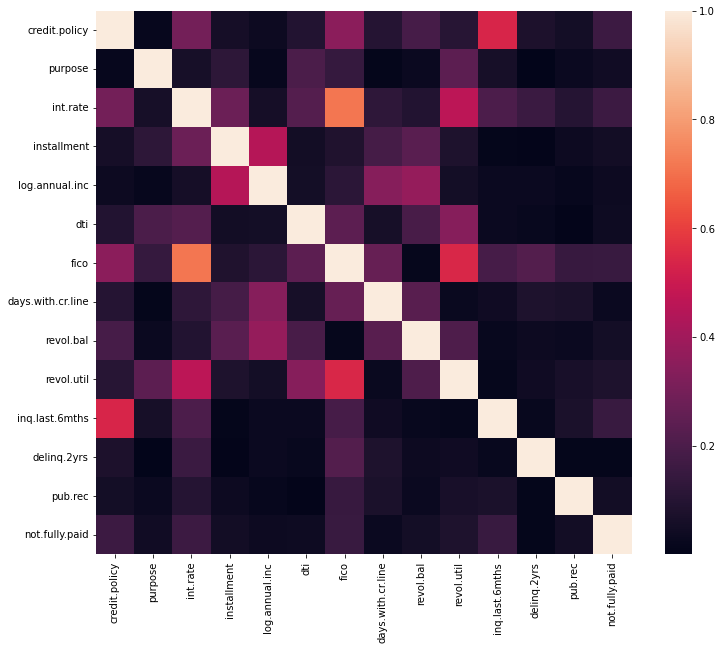

In [95]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix);

► fico & int.rate are highlty correlated, hence drop fico column.

In [96]:
df = df.drop('fico', axis=1)

In [97]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,2,0.1461,344.76,12.180755,10.39,10474.000000,215372,82.1,2,0,0,1
9574,0,2,0.1253,257.70,11.141862,0.21,4380.000000,184,1.1,5,0,0,1
9575,0,0,0.1071,97.81,10.596635,13.09,3450.041667,10036,82.9,8,0,0,1
9576,0,3,0.1600,351.58,10.819778,19.18,1800.000000,0,3.2,5,0,0,1


# 4. MODELLING

• Define X & Y variables - 

In [98]:
X = df.iloc[:, 0:12].values
X.shape

(9578, 12)

In [99]:
Y = df.iloc[:,12].values
Y.shape

(9578,)

• Scale the X Variable

In [100]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

In [101]:
X_scale = std_scale.fit_transform(X)

In [102]:
X_scale

array([[ 0.49222226, -0.89721761, -0.13931753, ..., -0.71698894,
        -0.29973008, -0.23700318],
       [ 0.49222226, -0.30578263, -0.57886837, ..., -0.71698894,
        -0.29973008, -0.23700318],
       [ 0.49222226, -0.89721761,  0.48648368, ..., -0.26247044,
        -0.29973008, -0.23700318],
       ...,
       [-2.03160257, -0.89721761, -0.57886837, ...,  2.91915909,
        -0.29973008, -0.23700318],
       [-2.03160257,  0.87708733,  1.39166043, ...,  1.55560358,
        -0.29973008, -0.23700318],
       [-2.03160257, -0.89721761,  0.61685894, ...,  2.01012208,
        -0.29973008, -0.23700318]])

• Splitting the Data - 

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, train_size=0.8, random_state=12)

In [105]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(7662, 12) (7662,) (1916, 12) (1916,)


In [106]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20, activation='relu', input_shape = (12,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=20, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
mdl_history = model.fit(X_train, Y_train, epochs=100, shuffle = True, validation_split = .25)

Epoch 1/100
180/180 [==============================] - 1s 3ms/step - loss: 0.5891 - accuracy: 0.7249 - val_loss: 0.4468 - val_accuracy: 0.8403
Epoch 2/100
180/180 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8428 - val_loss: 0.4204 - val_accuracy: 0.8403
Epoch 3/100
180/180 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8432 - val_loss: 0.4158 - val_accuracy: 0.8403
Epoch 4/100
180/180 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8432 - val_loss: 0.4142 - val_accuracy: 0.8403
Epoch 5/100
180/180 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8430 - val_loss: 0.4148 - val_accuracy: 0.8403
Epoch 6/100
180/180 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8430 - val_loss: 0.4136 - val_accuracy: 0.8403
Epoch 7/100
180/180 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8428 - val_loss: 0.4136 - val_accuracy: 0.8403

In [107]:
Y_predict = model.predict(X_test)

60/60 [==============================] - 0s 1ms/step


In [108]:
Y_predict = np.round(Y_predict)

In [109]:
Y_predict

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [110]:
Y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))

[[1581   10]
 [ 317    8]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.91      1591
           1       0.44      0.02      0.05       325

    accuracy                           0.83      1916
   macro avg       0.64      0.51      0.48      1916
weighted avg       0.77      0.83      0.76      1916



► Accuracy is 83% . . .